# PCA Analysis of LAT1 domains with cholesterol bound at CHOL3 Binding Site

In this notebook, we perform Principal Component Analysis (PCA) on the MD simulations of specific LAT1 regions, with cholesterol bound at the CHOL3 cholesterol binding site. 

PCA can be used to identify dominant modes of motion within a molecular trajectory, with the first principal component (PC1) capturing the largest variance in the system. Here, I focus on specific TMs that represent important LAT1 functional motifs. By looking at the temporal evolution of the projection onto PC1, over the simulation time, we can get a sense of how cholesterol affects key regions of the protein.

As with the other analyses, this notebook analyzes PCA across four independent replicates of LAT1-cholesterol complex, with cholesterol bound to the CHOL3 binding site. For access to the MD files used in this notebook, please refer to Zenodo (linked in the README file).

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import MDAnalysis as mda
from MDAnalysis.analysis import rms, align, pca
from MDAnalysis.analysis.align import AlignTraj

%matplotlib inline

**2. Load the Trajectory for CHOL3**

First, let's load the MD trajectory and topology files for each of the four replicate systems of LAT1 bound to cholesterol at the CHOL3 site. Each replicate allows us to assess the consistency of protein motion across different runs.

In [4]:
# Load the trajectory and topology files for four replicate systems of CHOL3
u31 = mda.Universe('../Files/CHOL3/clr3_md1.pdb', '../Files/CHOL3/clr3_md1.xtc')
u32 = mda.Universe('../Files/CHOL3/clr3_md2.pdb', '../Files/CHOL3/clr3_md2.xtc')
u33 = mda.Universe('../Files/CHOL3/clr3_md3.pdb', '../Files/CHOL3/clr3_md3.xtc')
u34 = mda.Universe('../Files/CHOL3/clr3_md4.pdb', '../Files/CHOL3/clr3_md4.xtc')

# Group the universes in a list for easy processing
chol3_replicates = [u31, u32, u33, u34]

**3. Define Transmembrane Regions (TMs)**

Here I define specific TMs in LAT1 to analyze their motion. These helices are key structural components of the protein, that regulate transport of substrates, therefore, understanding their motion can provide insights into how cholesterol binding affects protein dynamics.

In [5]:
# Define the transmembrane (TM) regions with residue ranges
tm_regions = {
    'TM6b': 'resid 260:267',
    'TM8': 'resid 323:356'
}

**4. Performing PCA and Analyzing Temporal Evolution**

First I will use a function that performs PCA on the selected transmembrane regions (TM6b and TM8). It returns the temporal evolution of the projection onto PC1, which captures the most significant motion of the protein in that region.

Then, I can use this to plot the projection of PC1 over the simulation time for the selected transmembrane regions (TM6b and TM8) across the four replicates. 

This gives us a sense of how this helices moves over time and across different simulations.

In [6]:
def perform_pca_and_get_temporal_evolution(universe, selection):
    pc_analysis = pca.PCA(universe, select=selection, align=False, mean=None, n_components=1).run()
    # Transform the trajectory and project onto PC1
    transformed = pc_analysis.transform(universe.atoms.select_atoms(selection), n_components=1)
    return transformed[:, 0]  # Return PC1 projection for all frames

**PCA for TM6b**

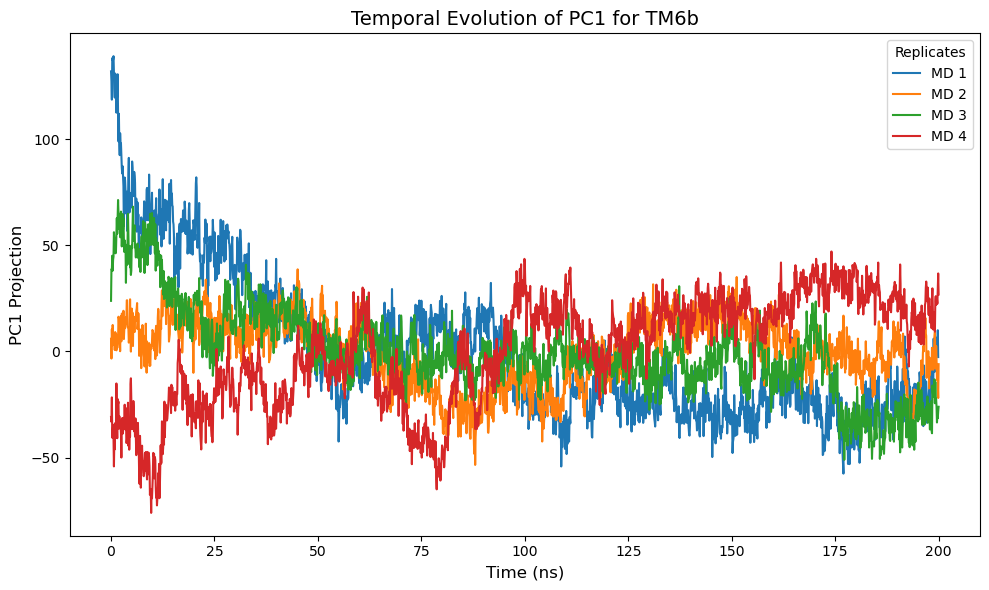

In [7]:
time_per_frame_ns = 0.1  # Assume each frame corresponds to 0.1 ns
fig, ax = plt.subplots(figsize=(10, 6))

for i, universe in enumerate(chol3_replicates):
    pc1_temporal_evolution = perform_pca_and_get_temporal_evolution(universe, tm_regions['TM6b'])
    num_frames = len(pc1_temporal_evolution)
    total_time_ns = num_frames * time_per_frame_ns
    time_ns = np.linspace(0, total_time_ns, num=num_frames, endpoint=False)
    
    # Plot the temporal evolution of PC1 for each replicate
    ax.plot(time_ns, pc1_temporal_evolution, label=f'MD {i+1}')

# Customize the plot
ax.set_title('Temporal Evolution of PC1 for TM6b', fontsize=14)
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel('PC1 Projection', fontsize=12)
ax.legend(title='Replicates', fontsize=10)

plt.tight_layout()
plt.show()

**Repeat for TM8**

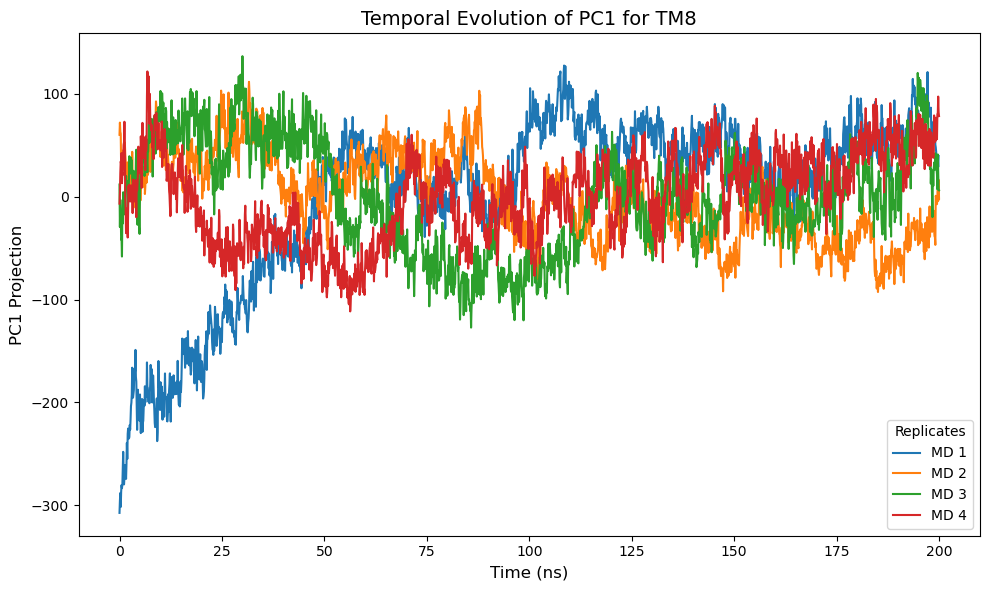

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, universe in enumerate(chol3_replicates):
    pc1_temporal_evolution = perform_pca_and_get_temporal_evolution(universe, tm_regions['TM8'])
    num_frames = len(pc1_temporal_evolution)
    total_time_ns = num_frames * time_per_frame_ns
    time_ns = np.linspace(0, total_time_ns, num=num_frames, endpoint=False)
    
    # Plot the temporal evolution of PC1 for each replicate
    ax.plot(time_ns, pc1_temporal_evolution, label=f'MD {i+1}')

# Customize the plot
ax.set_title('Temporal Evolution of PC1 for TM8', fontsize=14)
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel('PC1 Projection', fontsize=12)
ax.legend(title='Replicates', fontsize=10)

plt.tight_layout()
plt.show()

And we're done! 

Refer to the publication for detailed interpretation of these plots.